# SVM
### References:  
http://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html    


__import the libraries__

In [2]:
# For mathematical calculation
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt

# Import the sklearn for SVM
from sklearn import svm

# For creating datasets
from sklearn.datasets import make_circles

__create the dataset__

In [12]:
df, value = make_circles(n_samples=500,
            noise=.05,factor=.5)
print(df.shape)
df[:5,:]

(500, 2)


array([[-0.34008171,  0.39951558],
       [-0.37068133, -0.38117961],
       [ 0.74097174, -0.68447241],
       [-0.06427718, -0.46268444],
       [-0.85584396,  0.60965551]])

__Plot dataset__

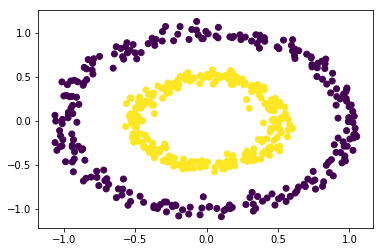

In [13]:
plt.scatter(df[:,0],df[:,1],c=value)
plt.show()


__Calculate the higher dimension value__


In [16]:
x = df[:,0]
y = df[:,1]
z = x**2 + y**2

kernals = ['linear','poly','rbf']
training_set = np.c_[x,y]


__Train and predict for each kernal__


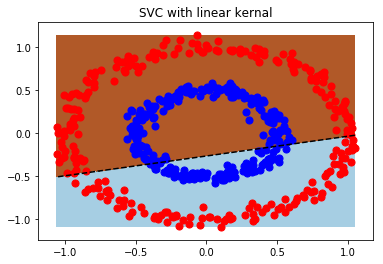

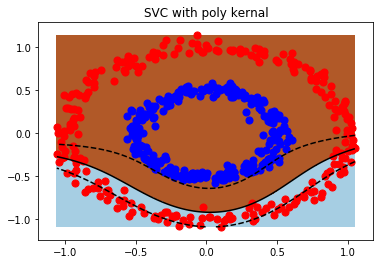

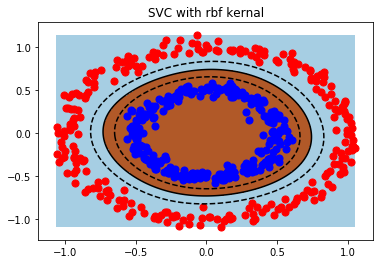

array([0., 1., 1.])

In [27]:
for idx,kernal in enumerate(kernals):   
    clf=svm.SVC(kernel=kernal,gamma=2)   
        
    # Train the model 
    clf.fit(training_set,value)

    # Test the model
    prediction = clf.predict([[-0.4,-0.4]])
    print(pre)
    # plot the line, the points, and the nearest vectors to the plane    
    X = training_set
    y = value
    X0 = X[np.where(y == 0)]
    X1 = X[np.where(y == 1)]
    plt.figure()    
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
           
    plt.scatter(X0[:, 0], X0[:, 1], c='r',s=50)
    plt.scatter(X1[:, 0], X1[:, 1], c='b',s=50)  
    title = ('SVC with {} kernal').format(kernal)
    plt.title(title)    
    plt.show()
prediction